## In this TD, we aim at exploring the gradient descent method for optimizing smooth functions. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig

## A. Gradient descent in 2D



In [2]:
weights = [0.1,1]
f = lambda x : np.sum(weights * x**2)

In [3]:
tx = np.linspace(-1,1,101)
ty = np.linspace(-.6,.6,101)
[v,u] = np.meshgrid(ty,tx)
F = (weights[0]* u ** 2 + weights[1] * v ** 2 ) / 2

<Figure size 720x720 with 0 Axes>

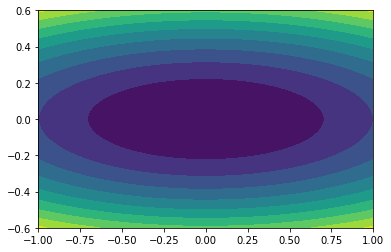

<Figure size 720x720 with 0 Axes>

In [4]:
plt.contourf(tx,ty,F.transpose(),10);
plt.figure(figsize = (10,10))

### Ex: Implement a generic gradient descent algorithm taking an initial point, the gradient of the function, a number of steps and a stepsize $\varepsilon$.   Compute by hand  the Lipschitz constant of the gradient.

In [7]:
#ref : https://encyclopediaofmath.org/wiki/Lipschitz_constant
# https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
# https://web.eecs.umich.edu/~fessler/course/598/l/n-03-gd.pdf
# Lipschitz = max du gradient

def GradientDescent(x0, gradient, iterationsNumber=50, eps = 0.01):
    currentEstimate = [x0]
    for i in range(iterationsNumber):
        curr = currentEstimate[-1] - eps * gradient(currentEstimate[-1])
        currentEstimate.append(curr)
    return currentEstimate

### Ex:  Plot the gradient descent for different initializations and different step size of the gradient descent. Try to show that the convergence can be really slow when the ratio between the two weights is very large or very small. This ratio is often called the condition number. Other optimization algorithms have to be used in order to avoid this slow convergence such as quasi-Newton methods.

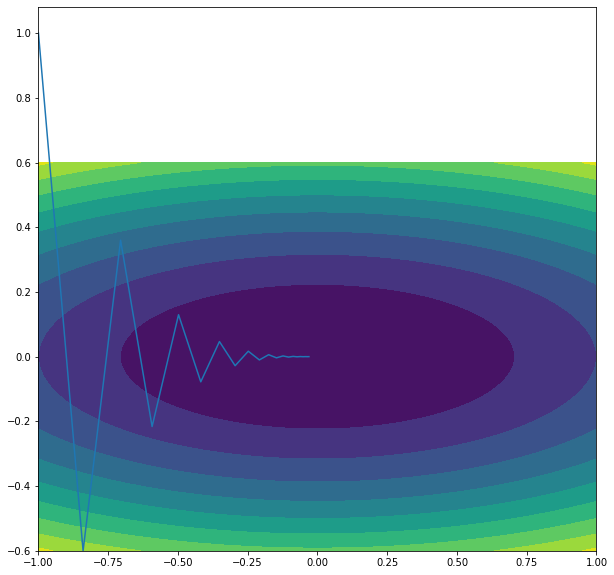

In [46]:
def getGradient():
    return lambda x : 2 * x * weights

gradient = getGradient()

#constant l = 2*1

gradList = GradientDescent(np.asarray([-1, 1]), gradient, 20, 0.8)
gradList2 = GradientDescent(np.asarray([-1, 1]), gradient, 20, 1.2)

plt.figure(figsize=(10, 10))
plt.contourf(tx,ty,F.transpose(),10)
plt.plot([x[0] for x in gradList], [x[1] for x in gradList])
plt.show()

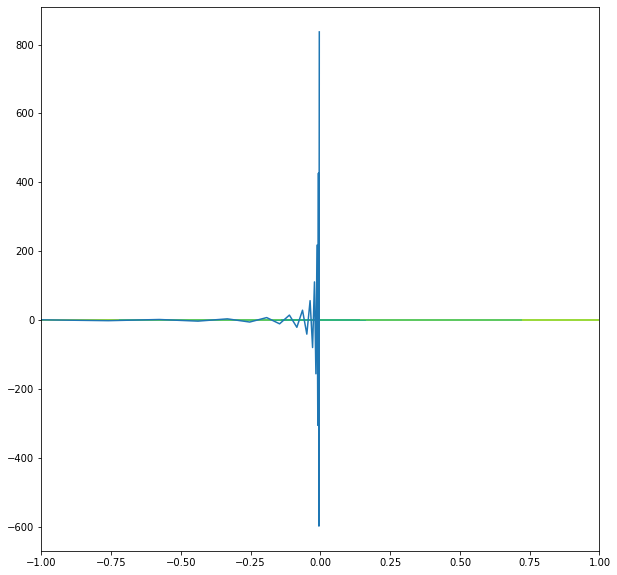

In [47]:
plt.figure(figsize=(10, 10))
plt.contourf(tx,ty,F.transpose(),10)
plt.plot([x[0] for x in gradList2], [x[1] for x in gradList2])
plt.show()

#with epsilon > 1, it diverges

## B. Example on a physical system

### We consider a massive ball of mass $m$, subject to gravity and the force of the wind. The ball is at rest at time $0$ in position $x_0 \in \mathbb{R}^3$. We want to find the initial $v0$ such that the ball will land at a given final point $x_1$ at time $1$.

In [48]:
# We implement the equations of the motion of the ball.
def Wind(t):
    return -np.asarray([-2,3,-0.2]) * np.cos(3*t) 

def GetPositionAtTime1(x0,v0,wind):
    number_of_timesteps = 1000
    timestep = 1.0/number_of_timesteps
    temp_x = x0.copy()
    temp_v = v0.copy()
    time = 0
    trajectory = [x0]
    times = [0]
    ## note that we use here a naive integrator: forward Euler.
    for i in range(number_of_timesteps):
        temp_x += timestep * (temp_v)
        temp_v += timestep * (2*np.asarray([0,0,-1]) + wind(time)) #2 is a chosen value representing the gravity times the mass
        time += timestep
        trajectory.append(temp_x.copy())
        times.append(time)
    return temp_x,trajectory,times     

### We test the computation of the function

In [49]:
# test 
x0 = np.asarray([0.,0.,0.]) # intial position
v0 = np.asarray([1.,1.,1.]) # initial speed
x1,trajectory,times = GetPositionAtTime1(x0,v0,Wind)
print("position at time 1",x1)
data = np.asarray(trajectory)

position at time 1 [1.44312482 0.33531278 0.04531248]


### We plot the trajectory.

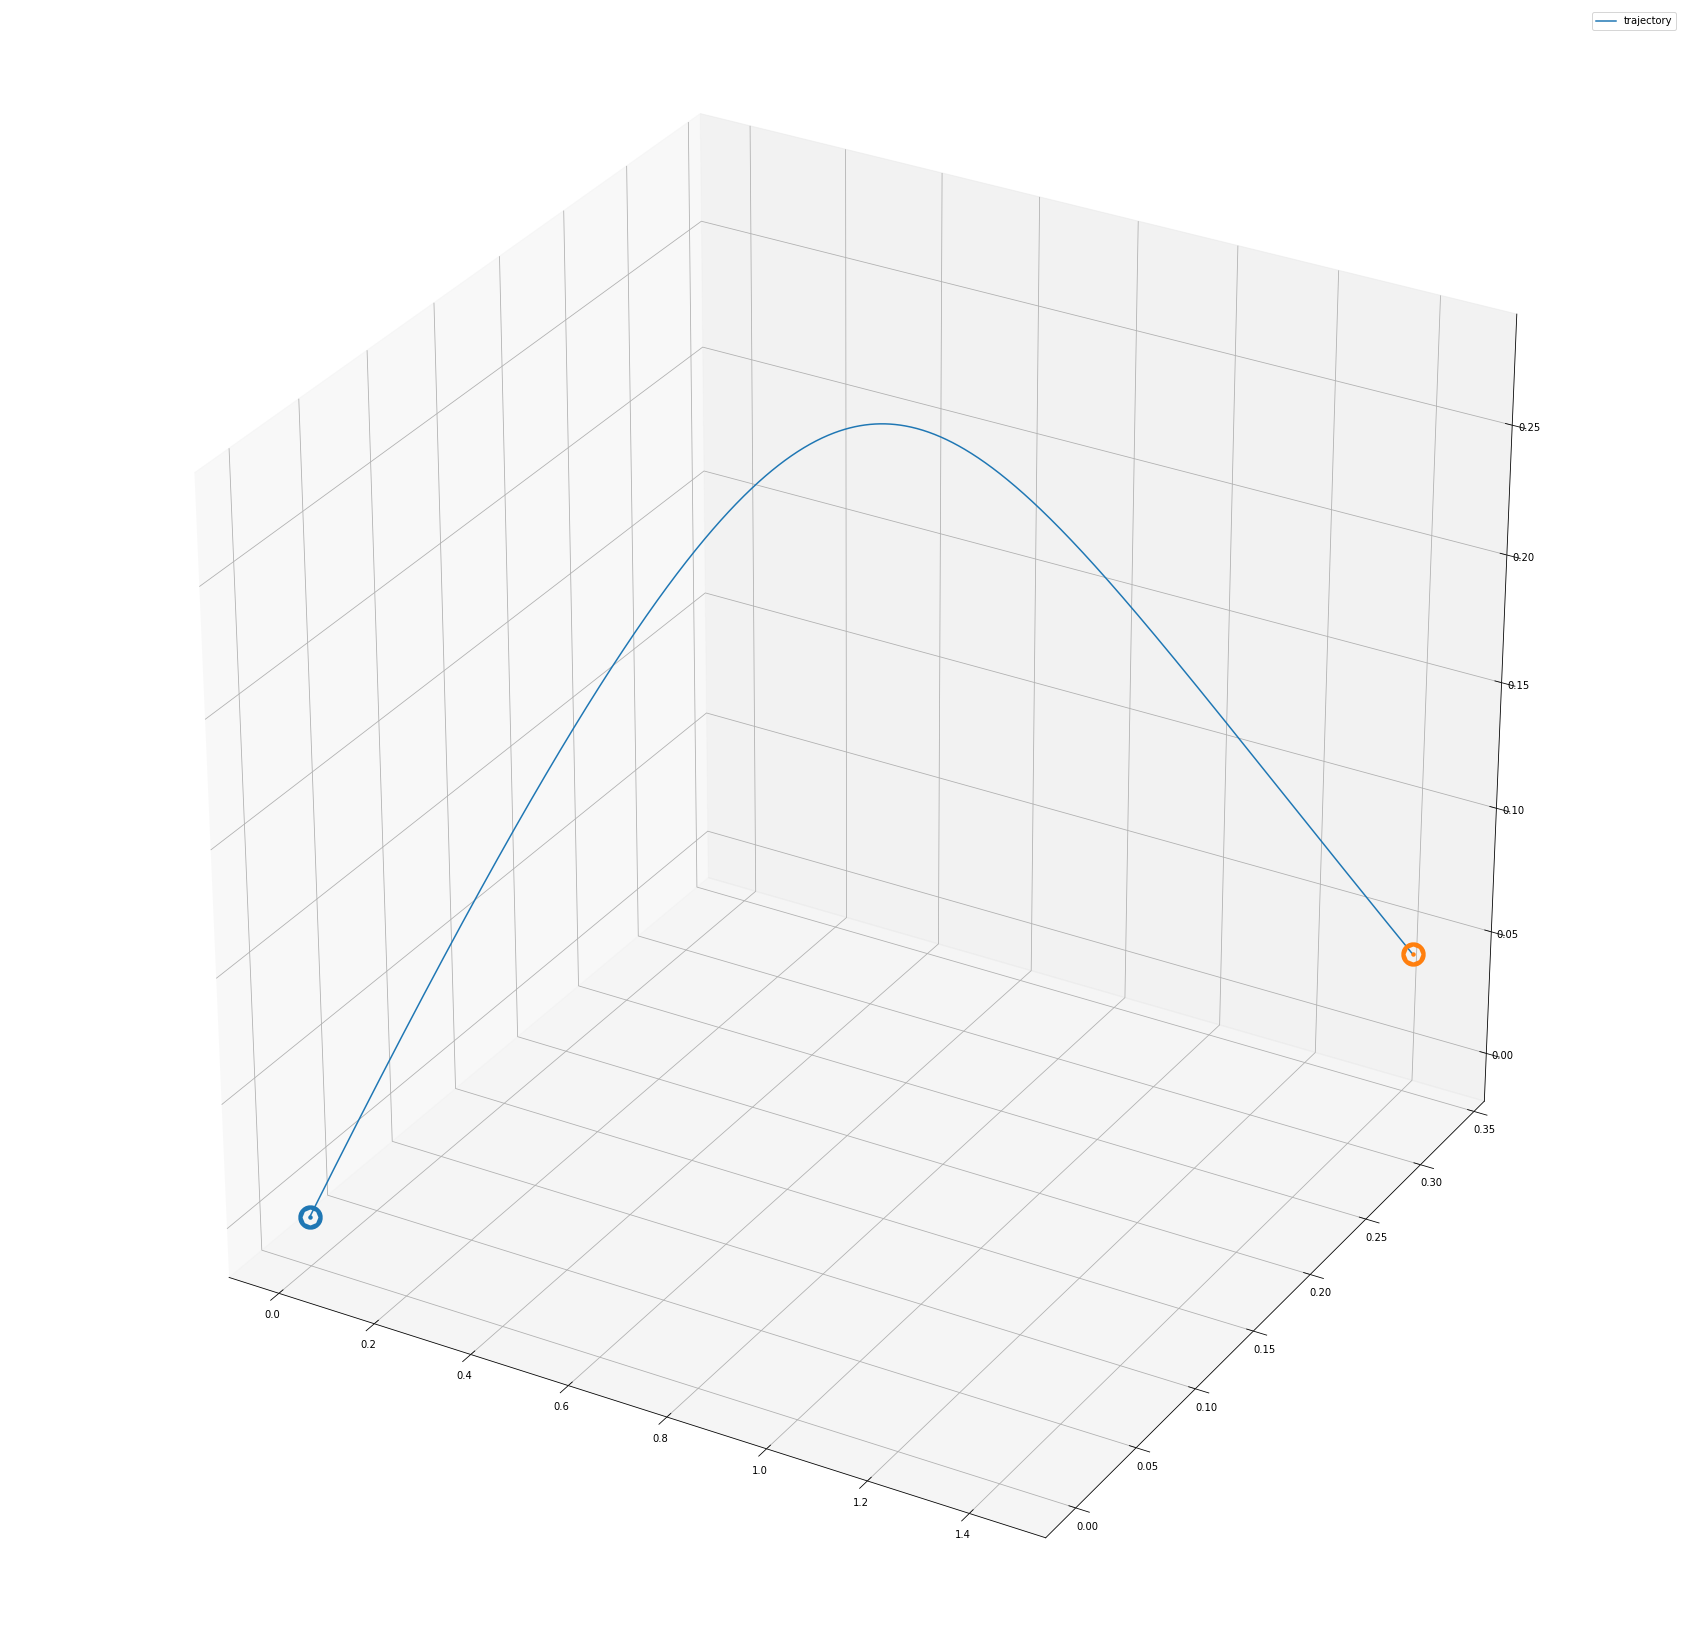

[0. 0. 0.] [1.44312482 0.33531278 0.04531248]


In [50]:
## prepare the trajectory
data = np.asarray(trajectory)
## Plot of the trajectory
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
mpl.rcParams["figure.figsize"] = (30,30)

ax = fig.gca(projection='3d')

ax.plot(data[:,0], data[:,1], data[:,2], label='trajectory')
ax.legend()
ax.scatter(x0[0],x0[1],x0[2],"bo",linewidths = 20)
ax.scatter(x1[0],x1[1],x1[2],"ro",linewidths = 20)
plt.show()
print(x0,x1)

### Ex: Implement the following approximation of the gradient: $\partial_i f(x) \simeq \frac{f(x + \varepsilon e_i) - f(x)}{\varepsilon}$ with $e_i$ is the vector $(0,\ldots,1, \ldots , 0)$ where the $1$ is at the $i^{\text{th}}$ position. Then, recall that the gradient at point $x$ of the function $f$ is the vector $(\partial_i f(x))_{i \in 1,\ldots,n}$.

In [53]:
epsilon = 0.0001

def ApproximatedGradient(myFunction,x):
    f_x = myFunction(x)
    #get gradient at index x
    gradientAtx = []
    for i in range(len(x)):
        e = np.zeros(len(x))
        e[i] = 1
        shifted_f_x = f(x + e * epsilon)
        gradientAtx.append((shifted_f_x - f_x) / epsilon)
    return gradientAtx

### Ex: Using the previous approximation of the gradient, use a gradient descent with constant step size to solve the problem. For that, we define the $L^2$ penalty function between the target and the point position at time $1$ and we compute the gradient. Use it to solve the problem and plot the trajectory.

In [55]:
def L2Penalty(finalPosition,target):
    return np.sum((finalPosition - target)**2)

def ComposedGradient(finalPosition,gradientFinalPosition,target):
    return 2*(finalPosition - t) * gradientFinalPosition

speed = np.asarray([1.,1.,1.])

#gradList = GradientDescent(speed, MyFunc, 50, 0.005)

## C. Example on a 2D image.

<Figure size 2160x2160 with 0 Axes>

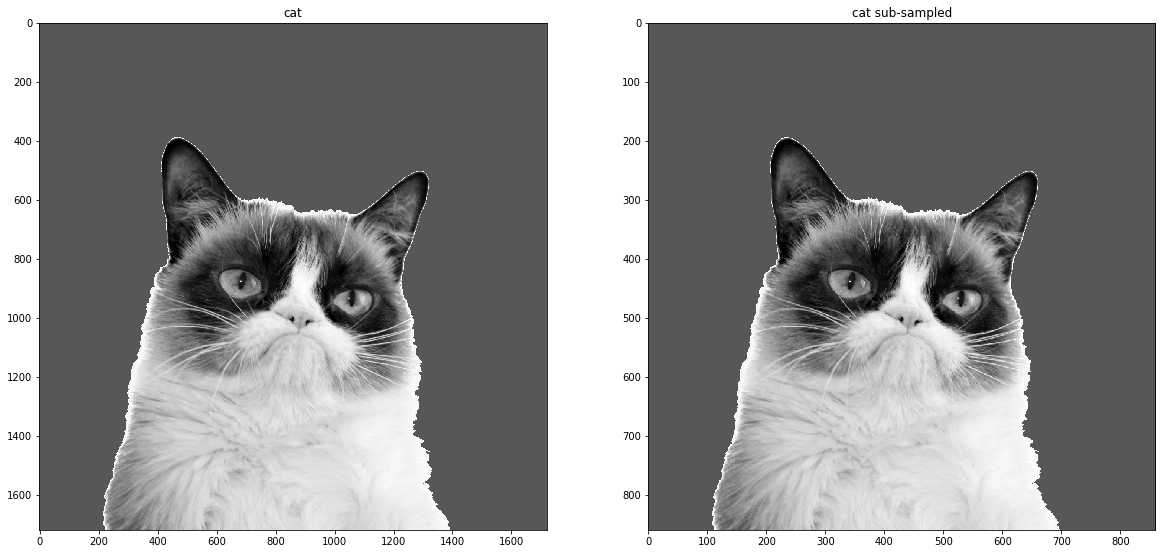

In [60]:
import imageio as imio
colored_image = imio.imread('grumpycat.png')
cat = np.sum(colored_image*[ 0.21, 0.72 ,0.07,0.0],axis=-1)
sub_defense = cat[::2,::2]
plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("cat")
plt.imshow(cat)
plt.subplot(1,2,2)
plt.title("cat sub-sampled")
plt.imshow(sub_defense)

In [61]:
def GenerateMask(shape,threshold = 2.0):
    temp = (np.random.rand(shape[0],shape[1])<0.5)*1.0
    filtering = np.array([[1,1],[1,1]])
    temp=  (sig.convolve(filtering,temp)<threshold)*1.0
    return temp[:shape[0],:shape[1]]

averaged pixel value on the remaining pixels 124.35855007512451
percentage of remaining pixels 0.31406300703082746


<Figure size 2160x2160 with 0 Axes>

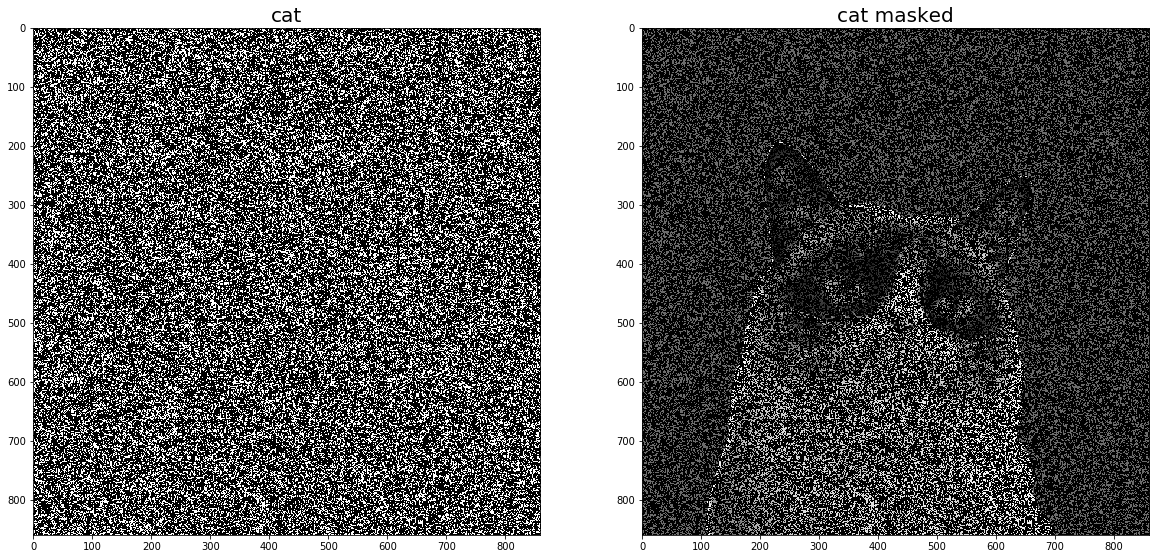

In [63]:
mask = GenerateMask(np.shape(sub_defense),2.0)
print("averaged pixel value on the remaining pixels",np.sum(sub_defense*mask)/np.sum(mask))
print("percentage of remaining pixels",np.sum(mask)/np.size(mask))

plt.gray()
taille = 20
plt.figure(figsize = (taille,taille))
plt.subplot(1,2,1)
plt.title("cat",size = taille)
plt.imshow(mask);
plt.subplot(1,2,2);
plt.title("cat masked",size = taille)
plt.imshow(sub_defense*mask);

### Compute on a sheet of paper the gradient of the function $f: \mathbb{R}^d \mapsto \mathbb{R}$ defined by $f(x_1,\ldots,x_n) = \sum_{i = 1}^{n-1} \frac12| x_i - x_{i+1}|^2$. 

### Compute the Lipschitz constant of the gradient (remark that it is a linear function).

### We propose to reconstruct a candidate for our initial image as the minimizer of an energy functional $E(I) = \sum_{i = 1}^{\text{nbre lignes}} f(I[i,:])$ under the constraint that $I (1-\text{mask}) = \text{data}$.

### Copy your gradient descent code and modify it to implement the projected gradient descent algorithm.

### Apply the algorithm to the data and comment. How do you suggest to modify the energy functional in order to improve the results ?

In [ ]:
# your code here.